# Spatial Data Manipulation: Vector

## 1. Overview of Geopandas

`Geopands` is one of the most important Python libraries for working with vector data. It is based on the `pandas` library and has dependencies on `Shapely`, `Fiona` and `pyproj`. 
* `Shapely` is a Python package for manipulation and analysis of planar features, using functions from the GEOS library (the engine of PostGIS) and a port of the JTS (Java Topology Suite). Shapely only deals with analyzing geometries and offers no capabilities for reading and writing geospatial files. 
* `pyproj` is a Python package that performs cartographic transformations and geodetic computations.


In [28]:
import geopandas as gpd  # import geopandas package and set alias as gpd
import pandas as pd

In [29]:
# Import the data with geopandas
# You can read geospatial data with `gpd.read_file()`, such as ESRI shapefile, GeoJSON, GeoPackage. To export geospatial data, you can use `gpd.to_file()`. 

emd_gdf = gpd.read_file('./data/Seoul_EMD_simplified.geojson')
emd_gdf.head(5)

,BASE_DATE,ADM_CD,ADM_NM,geometry
0,20240630,11240750,잠실4동,"POLYGON ((210330.09 547163.722, 209981.565 546..."
1,20240630,11240780,잠실7동,"POLYGON ((206502.446 544771.474, 206173.186 54..."
2,20240630,11240790,잠실2동,"POLYGON ((207788.263 545788.012, 206922.349 54..."
3,20240630,11240770,잠실6동,"POLYGON ((208949.521 547174.423, 209063.634 54..."
4,20240630,11240580,방이2동,"POLYGON ((209963.305 546454.792, 210471.944 54..."


In [30]:
# Check the Coordinate Reference System (CRS) of the GeoDataFrame
emd_gdf.crs

<Projected CRS: EPSG:5186>
Name: KGD2002 / Central Belt 2010
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore between 126°E and 128°E.
- bounds: (126.0, 33.14, 128.0, 38.33)
Coordinate Operation:
- name: Korea Central Belt 2010
- method: Transverse Mercator
Datum: Korean Geodetic Datum 2002
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [31]:
# The crs attribute is interited from the pyproj.CRS class
type(emd_gdf.crs)

pyproj.crs.crs.CRS

<Axes: >

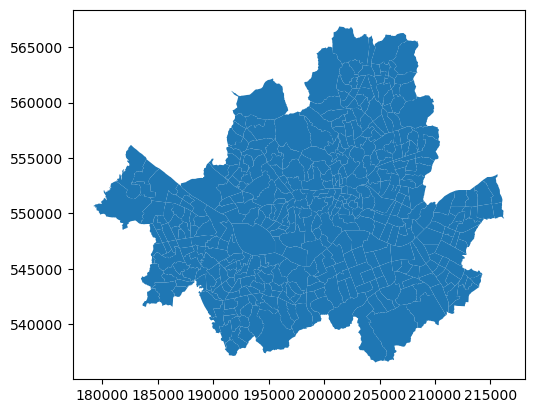

In [32]:
# In case of GeoDataFrame, the .plot() method shows the map of the data if the geometry column exists
emd_gdf.plot()

In [33]:
# Check the first record of the GeoDataFrame
emd_gdf.loc[0]

BASE_DATE                                             20240630
ADM_CD                                                11240750
ADM_NM                                                    잠실4동
geometry     POLYGON ((210330.09007956093 547163.7221481854...
Name: 0, dtype: object

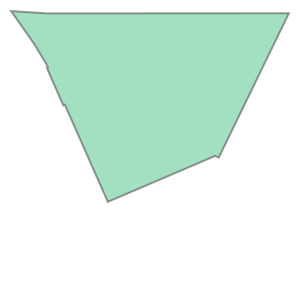

In [34]:
# Get the geometry of the first record
emd_gdf.loc[0, 'geometry']

In [35]:
# The geometry is a shapely object
type(emd_gdf.loc[0, 'geometry'])

shapely.geometry.polygon.Polygon

In [36]:
# The geometry is a shapely object
# wkt is a string representation of the geometry in the Well-Known Text (WKT) format
emd_gdf.loc[0, 'geometry'].wkt

'POLYGON ((210330.09007956093 547163.7221481854, 209981.5647064105 546446.6322253159, 209963.30463721274 546454.7918897419, 209430.08986385976 546226.5819634813, 209216.71969294365 546709.096034211, 209209.16818263917 546705.4424026984, 209127.24389058453 546892.330411045, 209132.44301759417 546894.4107161902, 209125.3926297059 546909.9137086625, 209063.63359655102 547012.4495391117, 208949.5207117854 547174.4233508565, 209129.6098976406 547162.8927091184, 210330.09007956093 547163.7221481854))'

## 2. Data Creation
### 2.1. Creating Vector data with `Shapely`

`Shapely` has the following classes to represent geometry.

| Geometry Type | Class |
| :-: | :-: |
| Point | shapely.geometry.Point() | 
| Line | shapely.geometry.LineString() <br> shapely.geometry.polygon.LinearRing() | 
| Polygon | shapely.geometry.Polygon() | 
| Collection of points | shapely.geometry.MultiPoint() | 
| Collection of lines | shapely.geometry.MultiLineString() | 
| Collection of polygons | shapely.geometry.MultiPolygon() | 

In [37]:
# Import shapely objects
from shapely.geometry import Point, LineString, Polygon, MultiPoint, MultiLineString, MultiPolygon

POINT (2 2)
<class 'shapely.geometry.point.Point'>


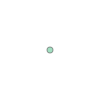

In [38]:
# creating a point
pnt = Point(2.0, 2.0)  # x, y coordinates of a point
print(pnt.wkt)
print(type(pnt))
pnt

LINESTRING (0 0, 3 5, 8 6, 10 10)
<class 'shapely.geometry.linestring.LineString'>


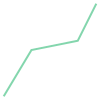

In [39]:
# creating a line
line = LineString([(0, 0), (3,5), (8, 6), (10,10)])  # x, y coordinates of sequences of points
print(line.wkt)
print(type(line))
line

POLYGON ((0 0, 5 0, 5 7, 0 9, 0 0))
<class 'shapely.geometry.polygon.Polygon'>


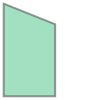

In [40]:
# creating a polygon
pyg = Polygon(((0, 0), (5, 0), (5, 7), (0, 9))) # The order should be kept. 
print(pyg.wkt) # The first and last points should be the same to make a polygon
print(type(pyg))
pyg

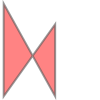

In [41]:
# The order of points matters. The example below shows a situation if the order of points is messed up. 
pyg2 = Polygon(((0, 0), (5, 7), (5, 0), (0, 9)))
pyg2

MULTIPOINT ((0 0), (3 3))
<class 'shapely.geometry.multipoint.MultiPoint'>


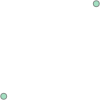

In [42]:
# a collection of points
pnts = MultiPoint([(0.0, 0.0), (3.0, 3.0)])
print(pnts.wkt)
print(type(pnts))
pnts

###  2.2. Converting DataFrame to GeoDataFrame

In [43]:
import pandas as pd

# Create a DataFrame with the capitals and its coordinates of some countries in South America. 
capitals = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

capitals

,City,Country,Latitude,Longitude
0,Buenos Aires,Argentina,-34.58,-58.66
1,Brasilia,Brazil,-15.78,-47.91
2,Santiago,Chile,-33.45,-70.66
3,Bogota,Colombia,4.60,-74.08
4,Caracas,Venezuela,10.48,-66.86


In [44]:
# It is possible to create a geometry column with the given coordinates
# gpd.points_from_xy is a function to create points based on given coordinates

capitals_gdf = gpd.GeoDataFrame(capitals, 
                                # a function to create points based on given coordinates
                                geometry=gpd.points_from_xy(capitals.Longitude, capitals.Latitude) 
                               )
capitals_gdf

,City,Country,Latitude,Longitude,geometry
0,Buenos Aires,Argentina,-34.58,-58.66,POINT (-58.66 -34.58)
1,Brasilia,Brazil,-15.78,-47.91,POINT (-47.91 -15.78)
2,Santiago,Chile,-33.45,-70.66,POINT (-70.66 -33.45)
3,Bogota,Colombia,4.60,-74.08,POINT (-74.08 4.6)
4,Caracas,Venezuela,10.48,-66.86,POINT (-66.86 10.48)


`capitals_gdf` is just created from DataFrame so it does not have crs. However, it is still able to be plotted.

None


<Axes: >

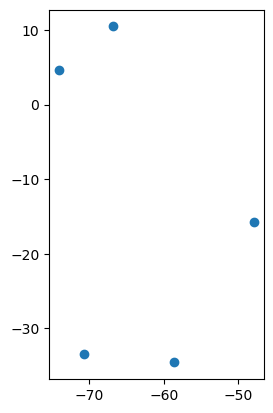

In [45]:
print(capitals_gdf.crs)
capitals_gdf.plot()

In [46]:
# .explore() method is a useful method to explore the data interactively
# But, it doesn't work if the crs is missing
capitals_gdf.explore()

In [47]:
# .set_crs() method is used to set the CRS of the GeoDataFrame
capitals_gdf = capitals_gdf.set_crs(epsg=4326)

capitals_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
# With the correct crs, the .explore() method works
capitals_gdf.explore()

## 3. Mockup Analysis

We want to calculate the maximum temperature of each dong. The following is the data employed and steps for our mockup analysis.

* Data: 
    - Sensor locations of S-DoT: './data/S_DoT_locations.xlsx'
    - Temperature data: './data/SDoT_Seoul_20240804.csv'
    - Dong Geometry of Seoul: './data/Seoul_EMD_simplify.geojson'
* Steps:
    - Load sensor location data (`sensor_df`) using Pandas and convert it to GeoDataFrame (`sensor_gdf`).
    - Load temperature data (`temp_df`) using Pandas and join with the `sensor_gdf`.
    - Find the associatd dong for each sensor location and calculate the maximum temperature of each dong.

### 3.1. Load sensor location data

In [49]:
# Import sensor location information from an Excel file
# pandas.read_excel() is used to read an Excel file while pandas.read_csv() is used to read a CSV file
sensor_df = pd.read_excel('./data/S_DoT_locations.xlsx')
sensor_df

,Serial_Num,Address,CRS,Lat,Lon
0,V02Q1940059,서울특별시 강남구 일원동 688,W84,37.489530,127.075346
1,V02Q1940293,서울특별시 강남구 개포동 1221-3,W84,37.476401,127.048489
2,V02Q1940060,서울특별시 강남구 일원동 735-1,W84,37.483397,127.086234
3,V02Q1940079,서울특별시 강남구 일원동 707,W84,37.494102,127.082209
4,V02Q1940129,서울특별시 강남구 대치동 16-1,W84,37.497656,127.074399
...,...,...,...,...,...
1154,V02Q2300006,서울특별시 은평구 진관동 56-16,W84,37.642148,126.915808
1155,V02Q2300007,서울특별시 은평구 진관동 74-22,W84,37.646318,126.908528
1156,OC3DL230025,서울특별시 종로구 교남동 74-7번지,W84,37.569467,126.963427
1157,OC3DL230026,서울특별시 종로구 행촌동 25-14,W84,37.572240,126.963676


---
### *Exercise*
1. Investigate the syntax below and create a GeoDataFrame from `sensor_df` with the following steps:
* Create a GeoDataFrame from `sensor_df` with the geometry column named `geometry`.
* Set the crs of the GeoDataFrame to WGS 84 (`EPSG:4326`).
* Save the GeoDataFrame into `sensor_gdf`.

```python
    sensor_gdf = gpd.GeoDataFrame(`INPUT DATAFRAME`, 
                                  geometry=gpd.points_from_xy(`LONGITUDE COLUMN OF A DATAFRAME`,
                                                              `LATITUDE COLUMN OF A DATAFRAME`), 
                                  crs=`EPSG:EPSG_CODE` # WGS 84
                                  )
```
---



In [50]:
# Your code here
sensor_gdf = gpd.GeoDataFrame(sensor_df, 
                              geometry=gpd.points_from_xy(sensor_df.Lon, sensor_df.Lat), 
                              crs='EPSG:4326')
sensor_gdf

,Serial_Num,Address,CRS,Lat,Lon,geometry
0,V02Q1940059,서울특별시 강남구 일원동 688,W84,37.489530,127.075346,POINT (127.07535 37.48953)
1,V02Q1940293,서울특별시 강남구 개포동 1221-3,W84,37.476401,127.048489,POINT (127.04849 37.4764)
2,V02Q1940060,서울특별시 강남구 일원동 735-1,W84,37.483397,127.086234,POINT (127.08623 37.4834)
3,V02Q1940079,서울특별시 강남구 일원동 707,W84,37.494102,127.082209,POINT (127.08221 37.4941)
4,V02Q1940129,서울특별시 강남구 대치동 16-1,W84,37.497656,127.074399,POINT (127.0744 37.49766)
...,...,...,...,...,...,...
1154,V02Q2300006,서울특별시 은평구 진관동 56-16,W84,37.642148,126.915808,POINT (126.91581 37.64215)
1155,V02Q2300007,서울특별시 은평구 진관동 74-22,W84,37.646318,126.908528,POINT (126.90853 37.64632)
1156,OC3DL230025,서울특별시 종로구 교남동 74-7번지,W84,37.569467,126.963427,POINT (126.96343 37.56947)
1157,OC3DL230026,서울특별시 종로구 행촌동 25-14,W84,37.572240,126.963676,POINT (126.96368 37.57224)


In [51]:
""" Test code for the previous function. This cell should NOT give any errors when it is run."""

# Check your result here. 
assert type(sensor_gdf) == gpd.GeoDataFrame
assert sensor_gdf.crs == 'EPSG:4326'
assert round(sensor_gdf.loc[0, 'geometry'].x, 4) == 127.0753

print("Success!")

Success!


<Axes: >

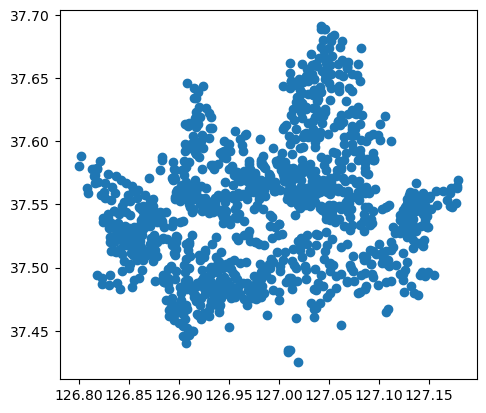

In [52]:
# Plot the sensor locations
sensor_gdf.plot()

### 3.2. Join(Merge) DataFrame

Merge DataFrame or named Series objects with a database-style join. The join is done on columns or indexes.

```python
joined_gdf = df_a.merge(right=`df_b`,
                        how='inner', # {‘left’, ‘right’, ‘outer’, ‘inner’, ‘cross’}, default ‘inner’
                        on=`column name` # Column or index level names to join on. If the columns have different names, specify `left_on` and `right_on`.
                        )
```


Source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

In [53]:
# Load temperature data
# Source: https://data.seoul.go.kr/dataList/OA-15969/S/1/datasetView.do
temp_df = pd.read_csv('./data/SDoT_Seoul_20240804.csv')
temp_df

,Model_Num,Serial_Num,Type,Date,TempMax
0,SDOT001,OC3CL200011,parks,20240804,34.8
1,SDOT001,OC3CL200012,traditional_markets,20240804,40.3
2,SDOT001,OC3CL200016,main_street,20240804,36.8
3,SDOT001,OC3CL200018,main_street,20240804,41.4
4,SDOT001,OC3CL200019,main_street,20240804,39.8
...,...,...,...,...,...
919,SDOT001,V02Q2300003,main_street,20240804,37.0
920,SDOT001,V02Q2300004,main_street,20240804,37.2
921,SDOT001,V02Q2300005,main_street,20240804,36.7
922,SDOT001,V02Q2300006,main_street,20240804,37.7


In [54]:
# Get the statistics of the 'TempMax' column
temp_df['TempMax'].describe()

count    924.000000
mean      38.253030
std        1.562896
min       25.800000
25%       37.500000
50%       38.300000
75%       39.100000
max       44.100000
Name: TempMax, dtype: float64

In [55]:
# Merge the sensor location data with the temperature data
sensor_data = sensor_gdf.merge(temp_df, on='Serial_Num', how='inner')
sensor_data

,Serial_Num,Address,CRS,Lat,Lon,geometry,Model_Num,Type,Date,TempMax
0,V02Q1940293,서울특별시 강남구 개포동 1221-3,W84,37.476401,127.048489,POINT (127.04849 37.4764),SDOT001,residential_area,20240804,39.6
1,V02Q1940060,서울특별시 강남구 일원동 735-1,W84,37.483397,127.086234,POINT (127.08623 37.4834),SDOT001,residential_area,20240804,37.1
2,V02Q1940246,서울특별시 강남구 대치동 27-14,W84,37.499371,127.072725,POINT (127.07273 37.49937),SDOT001,residential_area,20240804,35.1
3,V02Q1940094,서울특별시 강남구 세곡동 110-5,W84,37.466829,127.108893,POINT (127.10889 37.46683),SDOT001,residential_area,20240804,36.9
4,V02Q1940178,서울특별시 강남구 신사동 667-6,W84,37.521053,127.019456,POINT (127.01946 37.52105),SDOT001,residential_area,20240804,37.9
...,...,...,...,...,...,...,...,...,...,...
914,V02Q2300005,서울특별시 은평구 진관동 89-11,W84,37.634014,126.917378,POINT (126.91738 37.63401),SDOT001,main_street,20240804,36.7
915,V02Q2300006,서울특별시 은평구 진관동 56-16,W84,37.642148,126.915808,POINT (126.91581 37.64215),SDOT001,main_street,20240804,37.7
916,V02Q2300007,서울특별시 은평구 진관동 74-22,W84,37.646318,126.908528,POINT (126.90853 37.64632),SDOT001,main_street,20240804,35.9
917,OC3DL230025,서울특별시 종로구 교남동 74-7번지,W84,37.569467,126.963427,POINT (126.96343 37.56947),SDOT001,residential_area,20240804,36.8


<Axes: >

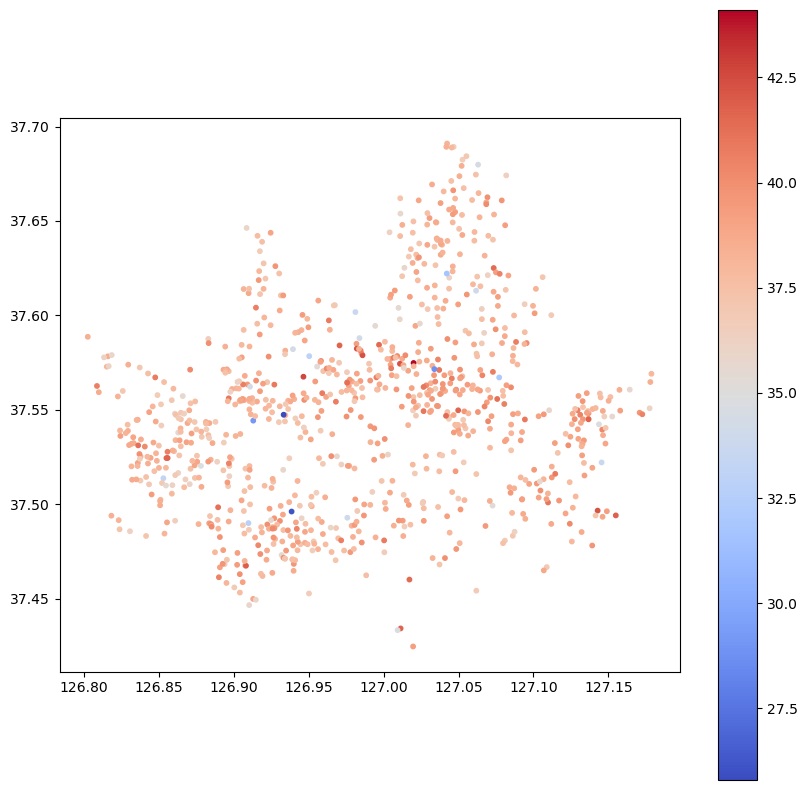

In [56]:
# Plot the temperature data
sensor_data.plot('TempMax', legend=True, cmap='coolwarm', markersize=10, figsize=(10, 10))

---
### *Exercise*
1. Investigate the syntax below and change the CRS of both `sensor_gdf` and `emd_gdf` to `EPSG:5179`. Currently, the CRS of the two GeoDataFrame are different. 

```python
    sensor_proj = sensor_data.to_crs(`EPSG:EPSG_CODE`)
    emd_proj = emd_gdf.to_crs(`EPSG:EPSG_CODE`)
``` 

---

In [57]:
# Your code here
sensor_proj = sensor_data.to_crs(epsg=5179)
emd_proj = emd_gdf.to_crs(epsg=5179)


In [58]:
""" Test code for the previous function. This cell should NOT give any errors when it is run."""

# Check your result here. 
assert sensor_proj.crs == 'EPSG:5179'
assert emd_proj.crs == 'EPSG:5179'

print("Success!")

Success!


### 3.3. Find the associated dong for each sensor location

We want to count the number of sensors in each dong and calculate the maximum temperature of each dong. 

In [59]:
## The entire code

# .iterrows is a generator that iterates over the rows of the DataFrame
# It returns an index (idx) and a Series for each row (row)
for idx, row in emd_proj.iterrows():

    # Find the sensors that are located in the current dong
    sensor_dong = sensor_proj.loc[sensor_proj['geometry'].intersects(row['geometry'])]
    
    # If there are sensors in the dong..
    if sensor_dong.shape[0] > 0:

        # Get the number of sensors in the dong
        emd_proj.at[idx, 'Sensor_Count'] = sensor_dong.shape[0]

        # Get the average of the 'TempMax' column in the dong
        emd_proj.at[idx, 'TempMax_Avg'] = sensor_dong['TempMax'].mean()

# Check the results
emd_proj

,BASE_DATE,ADM_CD,ADM_NM,geometry,Sensor_Count,TempMax_Avg
0,20240630,11240750,잠실4동,"POLYGON ((966144.947 1947247.39, 965792.751 19...",1.0,38.500
1,20240630,11240780,잠실7동,"POLYGON ((962306.123 1944876.429, 961977.2 194...",NaN,NaN
2,20240630,11240790,잠실2동,"POLYGON ((963596.828 1945885.733, 962731.473 1...",1.0,38.100
3,20240630,11240770,잠실6동,"POLYGON ((964764.987 1947265.422, 964878.194 1...",4.0,38.225
4,20240630,11240580,방이2동,"POLYGON ((965774.542 1946540.693, 966281.757 1...",2.0,40.200
...,...,...,...,...,...,...
421,20240630,11120720,불광2동,"POLYGON ((950615.707 1958659.082, 950664.35 19...",4.0,37.825
422,20240630,11120730,응암3동,"POLYGON ((948719.398 1955335.789, 948639.538 1...",2.0,38.550
423,20240630,11130660,홍은1동,"POLYGON ((950934.333 1954878.09, 950897.28 195...",1.0,39.400
424,20240630,11190660,신길4동,"POLYGON ((948397.792 1945310.253, 948400.663 1...",1.0,37.800


In [60]:
for idx, row in emd_proj.head(3).iterrows():
    print(f"Index: {idx}")
    print(row)
    print("--------------------")

Index: 0
BASE_DATE                                                20240630
ADM_CD                                                   11240750
ADM_NM                                                       잠실4동
geometry        POLYGON ((966144.9465000018 1947247.3897000002...
Sensor_Count                                                  1.0
TempMax_Avg                                                  38.5
Name: 0, dtype: object
--------------------
Index: 1
BASE_DATE                                                20240630
ADM_CD                                                   11240780
ADM_NM                                                       잠실7동
geometry        POLYGON ((962306.1226500007 1944876.4290000035...
Sensor_Count                                                  NaN
TempMax_Avg                                                   NaN
Name: 1, dtype: object
--------------------
Index: 2
BASE_DATE                                                20240630
ADM_CD                     

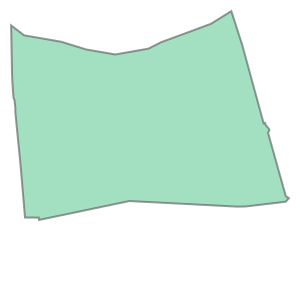

In [61]:
# The current geometry in the loop
row['geometry']

In [62]:
# Check the type of the geometry -> shapely object
type(row['geometry'])

shapely.geometry.polygon.Polygon

In [63]:
# Check the geometry of sensor if it intersects with the current geometry
sensor_proj['geometry'].intersects(row['geometry'])

0      False
1      False
2      False
3      False
4      False
       ...  
914    False
915    False
916    False
917    False
918    False
Length: 919, dtype: bool

In [64]:
# When wrapped with .loc[], it returns a GeoDataFrame with the True values
sensor_proj.loc[sensor_proj['geometry'].intersects(row['geometry'])]

,Serial_Num,Address,CRS,Lat,Lon,geometry,Model_Num,Type,Date,TempMax
616,V02Q1940708,서울특별시 송파구 잠실동 22,W84,37.514301,127.091478,POINT (963897.5 1946191.25),SDOT001,residential_area,20240804,38.1


Various options to check the spatial relationship between geometries
* .contains() returns True if the geometry contains the other geometry
* .within() returns True if the geometry is within the other geometry
* .intersects() returns True if the geometry intersects the other geometry

In [65]:
# This cell returns a value
sensor_proj.loc[sensor_proj['geometry'].within(row['geometry'])]

,Serial_Num,Address,CRS,Lat,Lon,geometry,Model_Num,Type,Date,TempMax
616,V02Q1940708,서울특별시 송파구 잠실동 22,W84,37.514301,127.091478,POINT (963897.5 1946191.25),SDOT001,residential_area,20240804,38.1


In [66]:
# This cell does not return a value
sensor_proj.loc[sensor_proj['geometry'].contains(row['geometry'])]

,Serial_Num,Address,CRS,Lat,Lon,geometry,Model_Num,Type,Date,TempMax


Now revisit the original code

In [67]:
## The entire code

# .iterrows is a generator that iterates over the rows of the DataFrame
# It returns an index (idx) and a Series for each row (row)
for idx, row in emd_proj.iterrows():

    # Find the sensors that are located in the current dong
    sensor_dong = sensor_proj.loc[sensor_proj['geometry'].intersects(row['geometry'])]
    
    # If there are sensors in the dong..
    if sensor_dong.shape[0] > 0:

        # Get the number of sensors in the dong
        emd_proj.at[idx, 'Sensor_Count'] = sensor_dong.shape[0]

        # Get the average of the 'TempMax' column in the dong
        emd_proj.at[idx, 'TempMax_Avg'] = sensor_dong['TempMax'].mean()

# Check the results
emd_proj

,BASE_DATE,ADM_CD,ADM_NM,geometry,Sensor_Count,TempMax_Avg
0,20240630,11240750,잠실4동,"POLYGON ((966144.947 1947247.39, 965792.751 19...",1.0,38.500
1,20240630,11240780,잠실7동,"POLYGON ((962306.123 1944876.429, 961977.2 194...",NaN,NaN
2,20240630,11240790,잠실2동,"POLYGON ((963596.828 1945885.733, 962731.473 1...",1.0,38.100
3,20240630,11240770,잠실6동,"POLYGON ((964764.987 1947265.422, 964878.194 1...",4.0,38.225
4,20240630,11240580,방이2동,"POLYGON ((965774.542 1946540.693, 966281.757 1...",2.0,40.200
...,...,...,...,...,...,...
421,20240630,11120720,불광2동,"POLYGON ((950615.707 1958659.082, 950664.35 19...",4.0,37.825
422,20240630,11120730,응암3동,"POLYGON ((948719.398 1955335.789, 948639.538 1...",2.0,38.550
423,20240630,11130660,홍은1동,"POLYGON ((950934.333 1954878.09, 950897.28 195...",1.0,39.400
424,20240630,11190660,신길4동,"POLYGON ((948397.792 1945310.253, 948400.663 1...",1.0,37.800


In [68]:
# If there is no sensor in the dong, the 'TempMax_Avg' column is NaN
emd_proj.loc[emd_proj['TempMax_Avg'].isna()]

,BASE_DATE,ADM_CD,ADM_NM,geometry,Sensor_Count,TempMax_Avg
1,20240630,11240780,잠실7동,"POLYGON ((962306.123 1944876.429, 961977.2 194...",NaN,NaN
24,20240630,11020700,다산동,"POLYGON ((957057.108 1951321.126, 956913.952 1...",NaN,NaN
45,20240630,11050580,중곡4동,"POLYGON ((964757.107 1952784.74, 964761.131 19...",NaN,NaN
48,20240630,11030530,남영동,"POLYGON ((953754.124 1950544.771, 953764.014 1...",NaN,NaN
64,20240630,11080780,장위3동,"POLYGON ((961405.077 1957301.78, 961457.544 19...",NaN,NaN
90,20240630,11010700,숭인1동,"POLYGON ((957495.935 1953244.988, 957541.341 1...",NaN,NaN
96,20240630,11170610,고척1동,"POLYGON ((944482.304 1945169.559, 944467.957 1...",NaN,NaN
100,20240630,11170670,오류1동,"POLYGON ((942541.632 1944308.794, 942593.244 1...",NaN,NaN
104,20240630,11020690,신당동,"POLYGON ((957441.224 1951909.87, 957276.596 19...",NaN,NaN
146,20240630,11050670,자양4동,"POLYGON ((962065.639 1949043.186, 961962.964 1...",NaN,NaN


<Axes: >

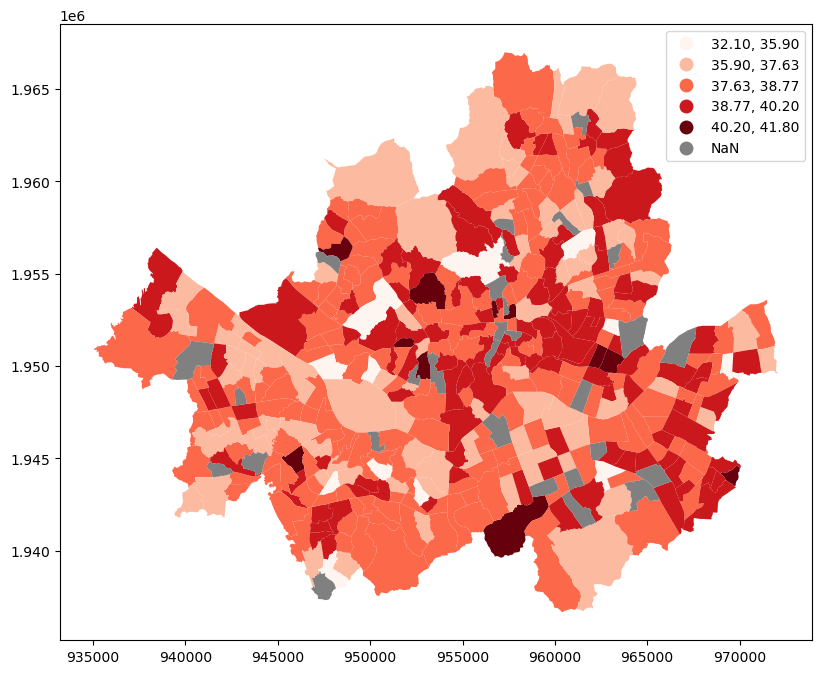

In [69]:
# Plot the result
emd_proj.plot('TempMax_Avg', 
              legend=True, 
              scheme='NaturalBreaks',
              cmap='Reds', 
              figsize=(10, 8), 
              missing_kwds={'color': 'grey'}
              )

### 3.4. Alternative approahch (.sjoin())

The `sjoin()` function in `geopandas` is a spatial join function that allows you to join two GeoDataFrames based on their spatial relationship. This could be more convenient than the previous approach.

```python
    gpd.sjoin(left_df, 
              right_df, 
              how='inner', # This can be 'left', 'right', or 'inner'
              predicate='intersects' # This can be contains, within, etc. 
              )
```
Source: https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html

In [70]:
# Get another file to conduct the spatial join
emd_sjoin = emd_gdf.to_crs(epsg=5179) 
emd_sjoin

,BASE_DATE,ADM_CD,ADM_NM,geometry
0,20240630,11240750,잠실4동,"POLYGON ((966144.947 1947247.39, 965792.751 19..."
1,20240630,11240780,잠실7동,"POLYGON ((962306.123 1944876.429, 961977.2 194..."
2,20240630,11240790,잠실2동,"POLYGON ((963596.828 1945885.733, 962731.473 1..."
3,20240630,11240770,잠실6동,"POLYGON ((964764.987 1947265.422, 964878.194 1..."
4,20240630,11240580,방이2동,"POLYGON ((965774.542 1946540.693, 966281.757 1..."
...,...,...,...,...
421,20240630,11120720,불광2동,"POLYGON ((950615.707 1958659.082, 950664.35 19..."
422,20240630,11120730,응암3동,"POLYGON ((948719.398 1955335.789, 948639.538 1..."
423,20240630,11130660,홍은1동,"POLYGON ((950934.333 1954878.09, 950897.28 195..."
424,20240630,11190660,신길4동,"POLYGON ((948397.792 1945310.253, 948400.663 1..."


In [71]:
# Conduct the spatial join
emd_sjoin_result = gpd.sjoin(emd_sjoin, sensor_proj, how='left', predicate='contains')  
emd_sjoin_result

,BASE_DATE,ADM_CD,ADM_NM,geometry,index_right,Serial_Num,Address,CRS,Lat,Lon,Model_Num,Type,Date,TempMax
0,20240630,11240750,잠실4동,"POLYGON ((966144.947 1947247.39, 965792.751 19...",618.0,V02Q1940800,서울특별시 송파구 신천동 20,W84,37.519993,127.112249,SDOT001,residential_area,20240804.0,38.5
1,20240630,11240780,잠실7동,"POLYGON ((962306.123 1944876.429, 961977.2 194...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20240630,11240790,잠실2동,"POLYGON ((963596.828 1945885.733, 962731.473 1...",616.0,V02Q1940708,서울특별시 송파구 잠실동 22,W84,37.514301,127.091478,SDOT001,residential_area,20240804.0,38.1
3,20240630,11240770,잠실6동,"POLYGON ((964764.987 1947265.422, 964878.194 1...",634.0,V02Q1940820,서울특별시 송파구 신천동 32,W84,37.511054,127.102262,SDOT001,roads_and_parks,20240804.0,39.5
3,20240630,11240770,잠실6동,"POLYGON ((964764.987 1947265.422, 964878.194 1...",636.0,OC3CL200033,서울특별시 송파구 신천동 32,W84,37.512143,127.104315,SDOT001,parks,20240804.0,35.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,20240630,11120730,응암3동,"POLYGON ((948719.398 1955335.789, 948639.538 1...",789.0,OC3CL200152,서울특별시 은평구 응암동 122-32,W84,37.595636,126.915619,SDOT001,roads_and_parks,20240804.0,37.7
423,20240630,11130660,홍은1동,"POLYGON ((950934.333 1954878.09, 950897.28 195...",451.0,V02Q1940412,서울특별시 서대문구 홍은동 11-314,W84,37.600293,126.945827,SDOT001,residential_area,20240804.0,39.4
424,20240630,11190660,신길4동,"POLYGON ((948397.792 1945310.253, 948400.663 1...",723.0,V02Q1940186,서울특별시 영등포구 신길동 223-66,W84,37.509147,126.910958,SDOT001,residential_area,20240804.0,37.8
425,20240630,11200680,대방동,"POLYGON ((950082.757 1945453.434, 950057.927 1...",362.0,V02Q1940295,서울특별시 동작구 대방동 501,W84,37.508713,126.925168,SDOT001,residential_area,20240804.0,38.3


In [72]:
# Calculate the average of the 'TempMax' column and the count of sensors in each dong
emd_sjoin_clean = emd_sjoin_result.groupby(['ADM_CD', 'ADM_NM']).agg({'TempMax': 'mean', 
                                                                      'Serial_Num': 'count'}
                                                                      ).reset_index()
emd_sjoin_clean

,ADM_CD,ADM_NM,TempMax,Serial_Num
0,11010530,사직동,37.700000,5
1,11010540,삼청동,38.566667,3
2,11010550,부암동,39.600000,2
3,11010560,평창동,36.675000,4
4,11010570,무악동,39.600000,2
...,...,...,...,...
421,11250730,천호2동,39.366667,6
422,11250740,길동,37.750000,4
423,11250750,강일동,38.250000,2
424,11250760,상일1동,39.766667,3


In [73]:
# Compare with the previous result
emd_proj

,BASE_DATE,ADM_CD,ADM_NM,geometry,Sensor_Count,TempMax_Avg
0,20240630,11240750,잠실4동,"POLYGON ((966144.947 1947247.39, 965792.751 19...",1.0,38.500
1,20240630,11240780,잠실7동,"POLYGON ((962306.123 1944876.429, 961977.2 194...",NaN,NaN
2,20240630,11240790,잠실2동,"POLYGON ((963596.828 1945885.733, 962731.473 1...",1.0,38.100
3,20240630,11240770,잠실6동,"POLYGON ((964764.987 1947265.422, 964878.194 1...",4.0,38.225
4,20240630,11240580,방이2동,"POLYGON ((965774.542 1946540.693, 966281.757 1...",2.0,40.200
...,...,...,...,...,...,...
421,20240630,11120720,불광2동,"POLYGON ((950615.707 1958659.082, 950664.35 19...",4.0,37.825
422,20240630,11120730,응암3동,"POLYGON ((948719.398 1955335.789, 948639.538 1...",2.0,38.550
423,20240630,11130660,홍은1동,"POLYGON ((950934.333 1954878.09, 950897.28 195...",1.0,39.400
424,20240630,11190660,신길4동,"POLYGON ((948397.792 1945310.253, 948400.663 1...",1.0,37.800


# Done